In [1]:
import torch
import glob
import numpy as np
import pandas as pd
from torch import nn, optim
from torch.nn import functional as F
import time 
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
main_folder = '..//data//torch main//'
main_folder_raw = '..//data//raw main//'

In [4]:
winLen = 35000

In [5]:
def data_loader(path):  
    # Print the working path
    print('Working on: ', path)

    # Use glob to find all CSV files in the given path
    allFiles = glob.glob(path + "/*.csv")

    # Initialize a counter for the number of files processed
    fileNum = 0

    # Initialize an empty list to store the tensors
    dataTorch = []

    # Loop through each CSV file in the path
    for file_ in allFiles:
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(file_, index_col=0, header=None)

        # Reset the index and convert the DataFrame into a NumPy array
        numpy_array = df.reset_index().values

        # Convert the NumPy array into a PyTorch tensor
        tensor = torch.from_numpy(numpy_array).view(-1,1,winLen)

        # Append the tensor to the list
        dataTorch.append(tensor) 

        # Increment the file counter
        fileNum += 1

        # Print some information about the tensor
        print('File number: ', fileNum, ' out of', len(allFiles), 'finished', 'shape :', tensor.shape)

    # Return the list of tensors
    return dataTorch

In [6]:
def load_plot_save(path):
    # Load the data from the given path
    data = data_loader(path)

    # Loop through each tensor in the data and print its shape
    for i in range(len(data)):
        print("Shape of the data {} : ".format(i))
        print(data[i].shape)
        if data[i].shape[0] > 100:
            data[i] = data[i].narrow(0, 0, 100)

    # Concatenate the tensors into a single tensor
    data_cat = torch.cat(data, 0)

    # Print the shape of the concatenated tensor
    print('Data_cat: ', data_cat.shape)

    # Save the concatenated tensor to a file
    torch.save(data_cat, main_folder+path.split('\\')[-2])

In [7]:
allFiles = glob.glob(main_folder_raw + "/*/")
allFiles

['..//data//raw main\\demi\\',
 '..//data//raw main\\demi_20_dec\\',
 '..//data//raw main\\dry\\',
 '..//data//raw main\\wet\\',
 '..//data//raw main\\wet_20_dec\\']

In [8]:
for file in allFiles:
    load_plot_save(file)
    print('----'*10)

Working on:  ..//data//raw main\demi\
File number:  1  out of 24 finished shape : torch.Size([256, 1, 35000])
File number:  2  out of 24 finished shape : torch.Size([302, 1, 35000])
File number:  3  out of 24 finished shape : torch.Size([211, 1, 35000])
File number:  4  out of 24 finished shape : torch.Size([258, 1, 35000])
File number:  5  out of 24 finished shape : torch.Size([199, 1, 35000])
File number:  6  out of 24 finished shape : torch.Size([207, 1, 35000])
File number:  7  out of 24 finished shape : torch.Size([175, 1, 35000])
File number:  8  out of 24 finished shape : torch.Size([181, 1, 35000])
File number:  9  out of 24 finished shape : torch.Size([221, 1, 35000])
File number:  10  out of 24 finished shape : torch.Size([175, 1, 35000])
File number:  11  out of 24 finished shape : torch.Size([152, 1, 35000])
File number:  12  out of 24 finished shape : torch.Size([178, 1, 35000])
File number:  13  out of 24 finished shape : torch.Size([155, 1, 35000])
File number:  14  out 

File number:  17  out of 26 finished shape : torch.Size([315, 1, 35000])
File number:  18  out of 26 finished shape : torch.Size([283, 1, 35000])
File number:  19  out of 26 finished shape : torch.Size([151, 1, 35000])
File number:  20  out of 26 finished shape : torch.Size([155, 1, 35000])
File number:  21  out of 26 finished shape : torch.Size([244, 1, 35000])
File number:  22  out of 26 finished shape : torch.Size([263, 1, 35000])
File number:  23  out of 26 finished shape : torch.Size([274, 1, 35000])
File number:  24  out of 26 finished shape : torch.Size([219, 1, 35000])
File number:  25  out of 26 finished shape : torch.Size([151, 1, 35000])
File number:  26  out of 26 finished shape : torch.Size([155, 1, 35000])
Shape of the data 0 : 
torch.Size([262, 1, 35000])
Shape of the data 1 : 
torch.Size([173, 1, 35000])
Shape of the data 2 : 
torch.Size([261, 1, 35000])
Shape of the data 3 : 
torch.Size([231, 1, 35000])
Shape of the data 4 : 
torch.Size([225, 1, 35000])
Shape of the da

In [9]:
def plot_mean(file):
    # Load the data from the file
    data_final = torch.load(file)

    # Print the shape of the data
    print("Data shape: ", data_final.shape)

    # Take the last 3000 samples from the third dimension of the data tensor
    ending_wind = data_final.narrow(2,32000, 3000)

    # Compute the mean of the data along the third dimension and reshape the tensor
    mean_wind = torch.mean(ending_wind.float(), 2).view(-1)

    # Create a new figure
    plt.figure()

    # Plot the mean data
    plt.plot(mean_wind)

    # Set the title of the plot to the name of the file
    plt.title(file)

In [10]:
def plot_windows(file, index):
    # Load the data from the file
    data_final = torch.load(file)

    # Print the shape of the data
    print("Data shape: ", data_final.shape)

    # Create a new figure
    plt.figure()

    # Loop through 10 windows of data starting at the given index
    for i in range(10):
        # Take a single window of data at the given index
        window = data_final.narrow(0,index+i,1)

        # Reshape the window into a 1D tensor
        window = window.view(-1)

        # Plot the window with a label
        plt.plot(window, label='Window {}'.format(index+i))

    # Add a legend to the plot
    plt.legend()

    # Set the title of the plot to the name of the file
    plt.title(file)


In [11]:
allFiles = glob.glob(main_folder + "/*")
allFiles

['..//data//torch main\\demi',
 '..//data//torch main\\demi_20_dec',
 '..//data//torch main\\dry',
 '..//data//torch main\\wet',
 '..//data//torch main\\wet_20_dec']

Data shape:  torch.Size([2400, 1, 35000])


<IPython.core.display.Javascript object>


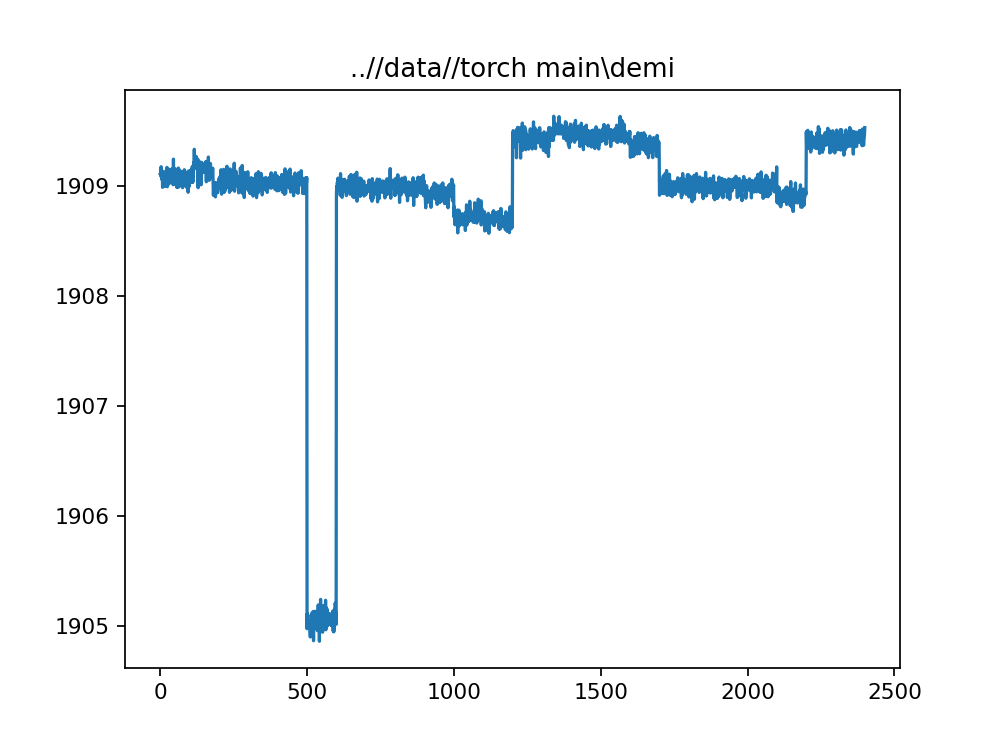

Data shape:  torch.Size([2400, 1, 35000])


<IPython.core.display.Javascript object>


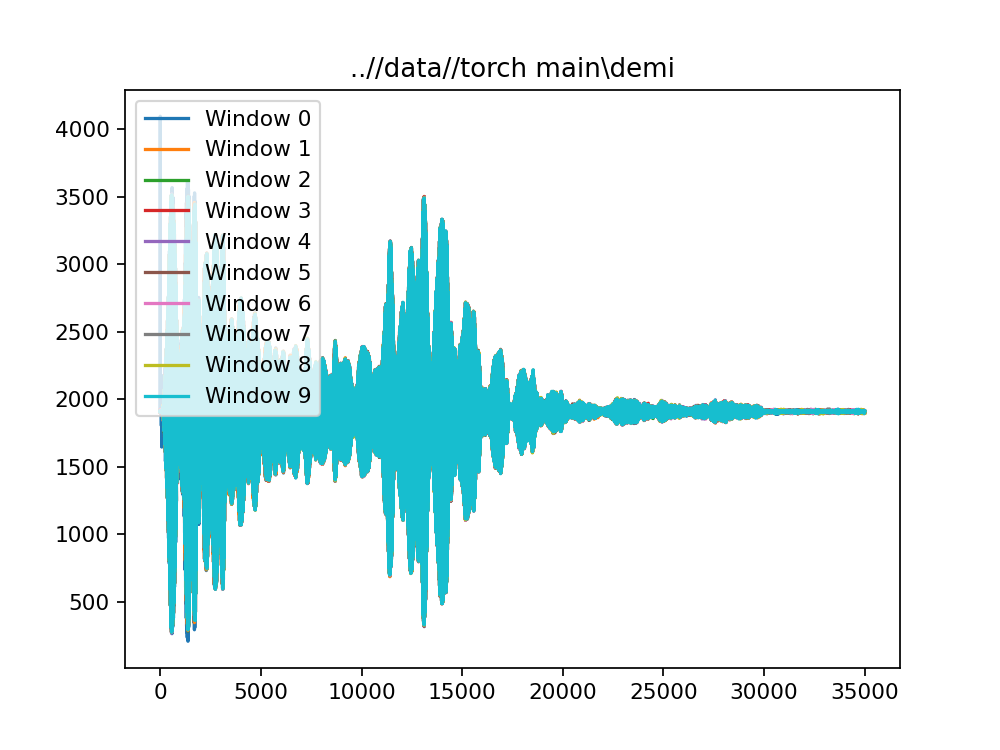

Data shape:  torch.Size([523, 1, 35000])


<IPython.core.display.Javascript object>


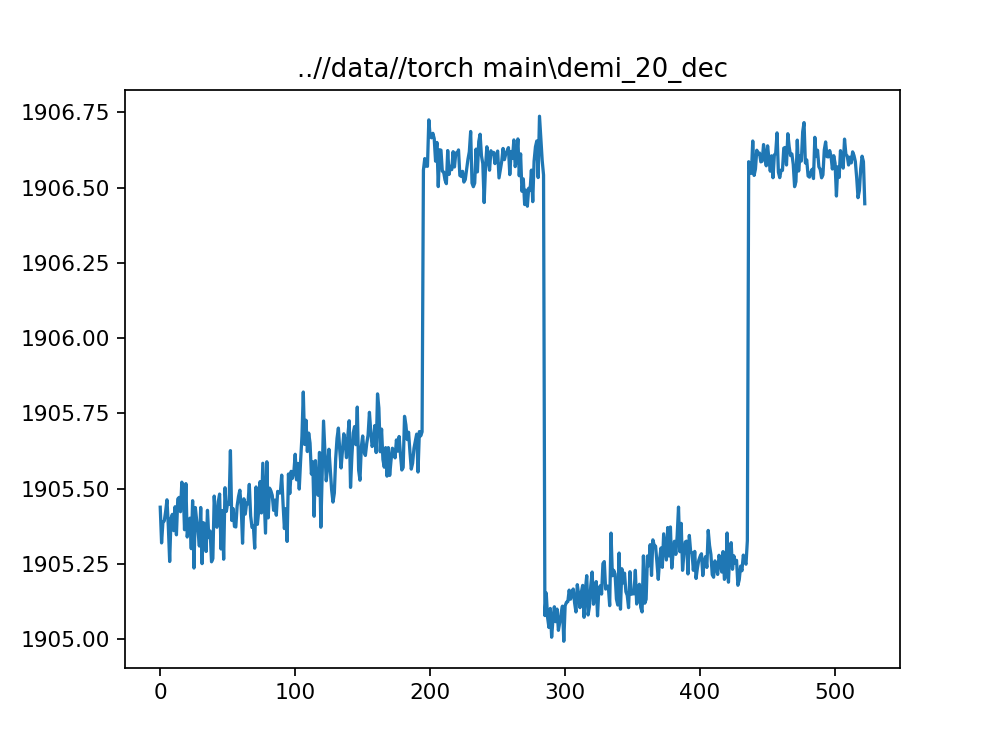

Data shape:  torch.Size([523, 1, 35000])


<IPython.core.display.Javascript object>


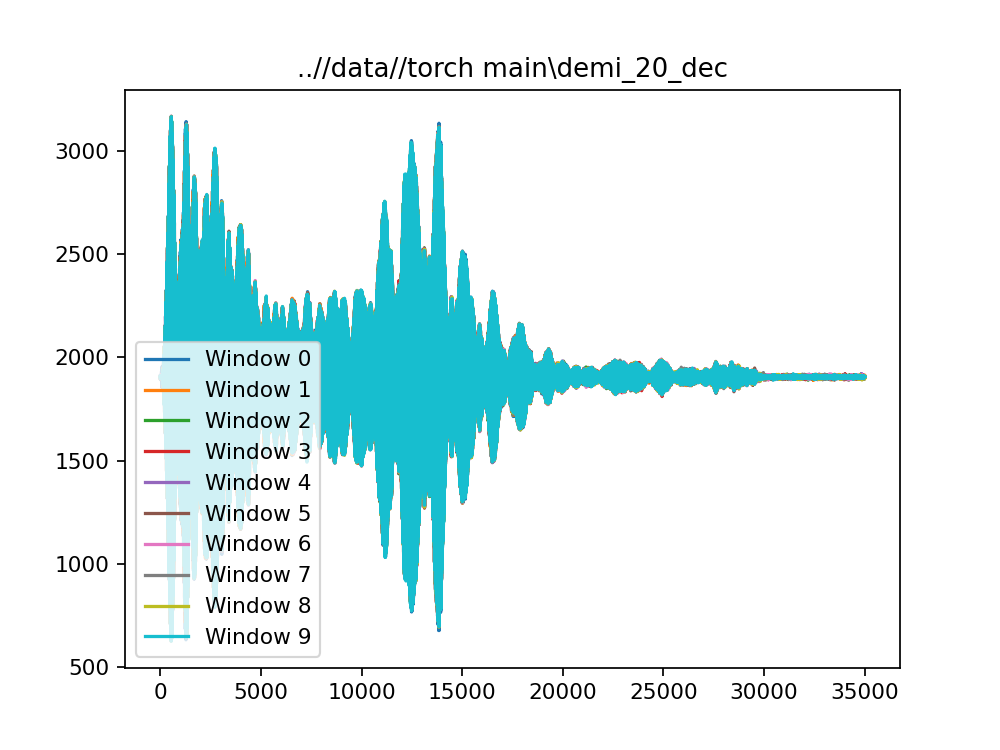

Data shape:  torch.Size([2382, 1, 35000])


<IPython.core.display.Javascript object>


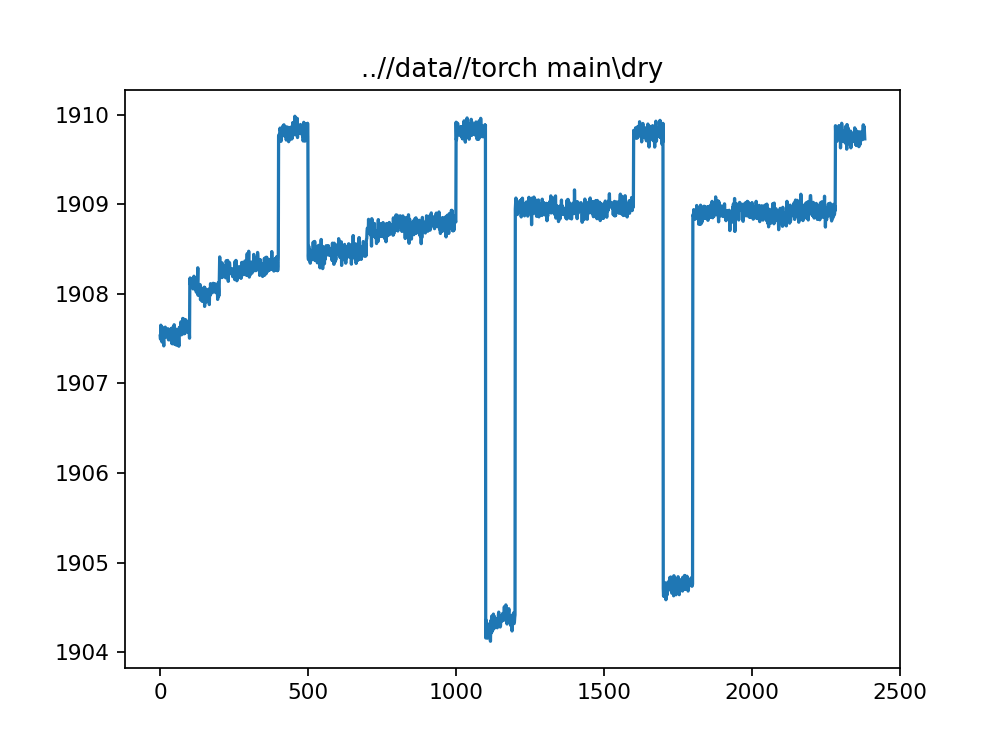

Data shape:  torch.Size([2382, 1, 35000])


<IPython.core.display.Javascript object>


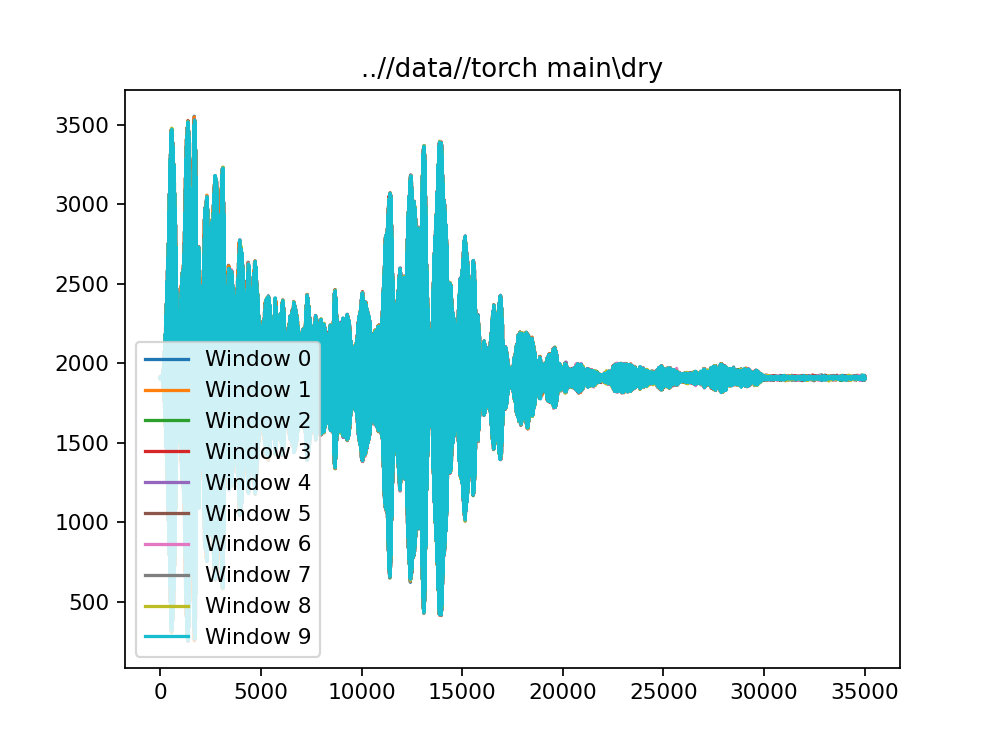

Data shape:  torch.Size([2600, 1, 35000])


<IPython.core.display.Javascript object>


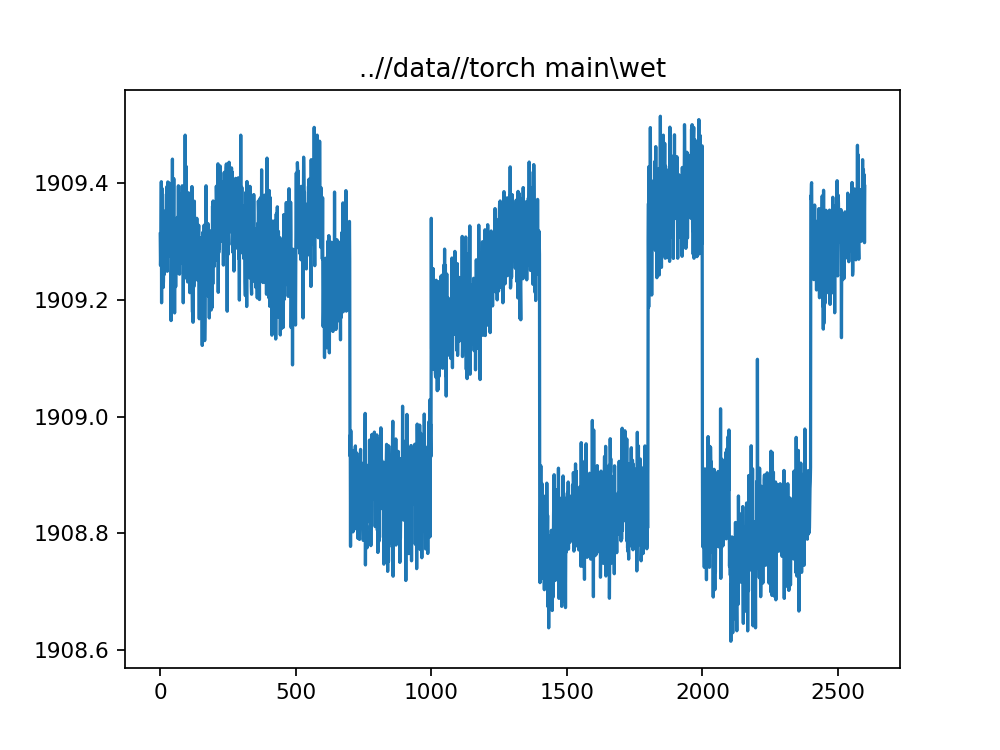

Data shape:  torch.Size([2600, 1, 35000])


<IPython.core.display.Javascript object>


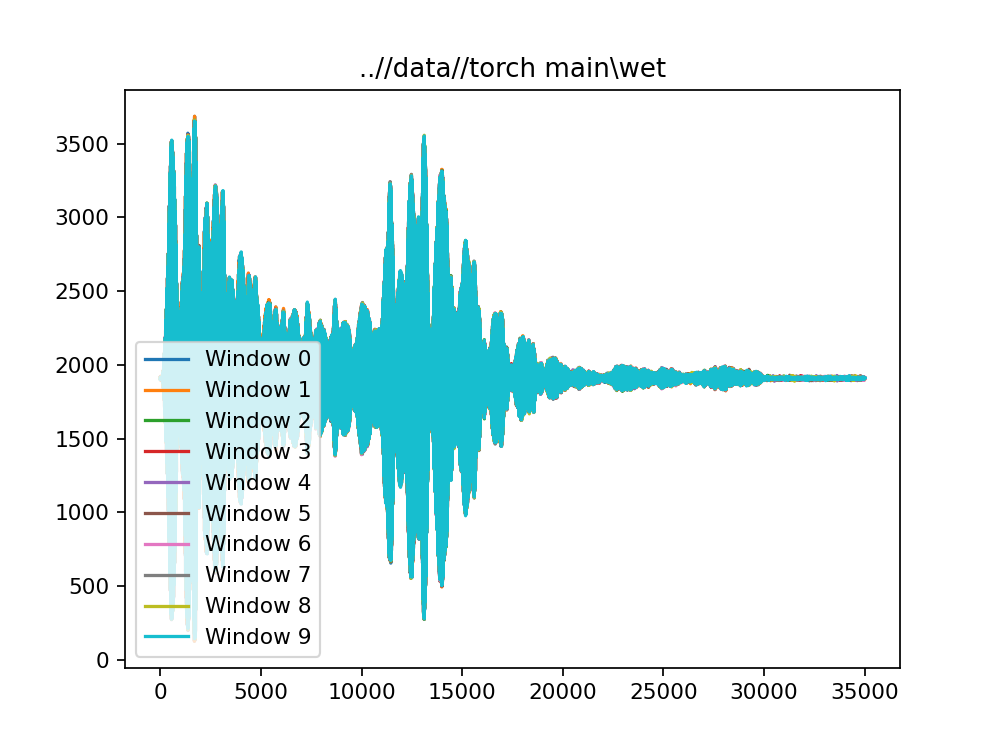

Data shape:  torch.Size([377, 1, 35000])


<IPython.core.display.Javascript object>


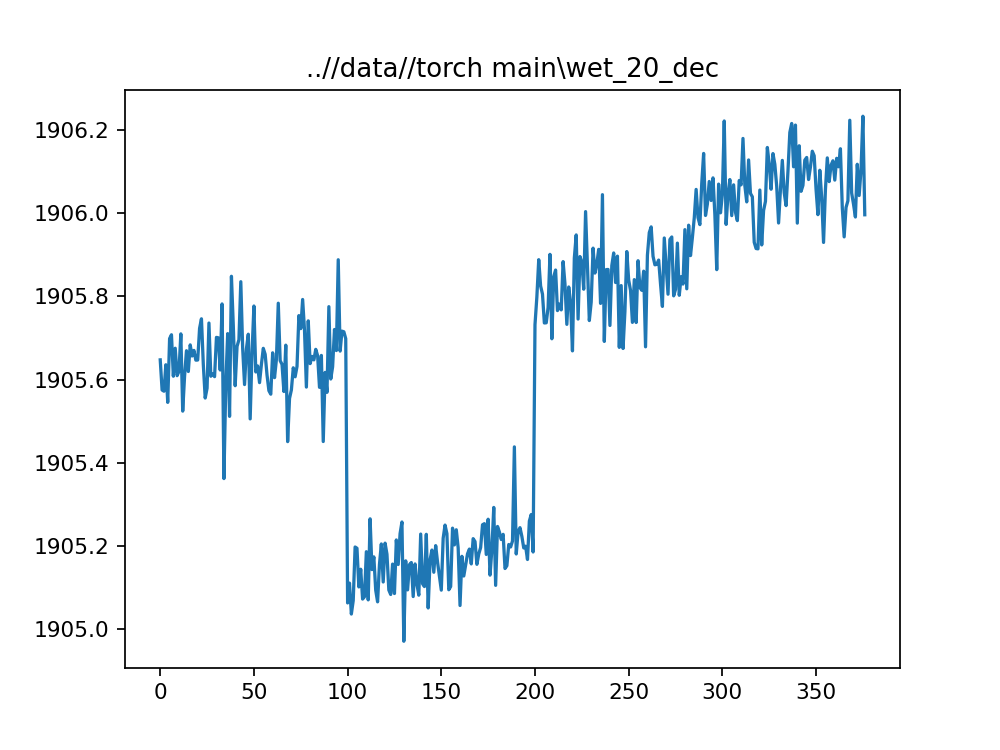

Data shape:  torch.Size([377, 1, 35000])


<IPython.core.display.Javascript object>


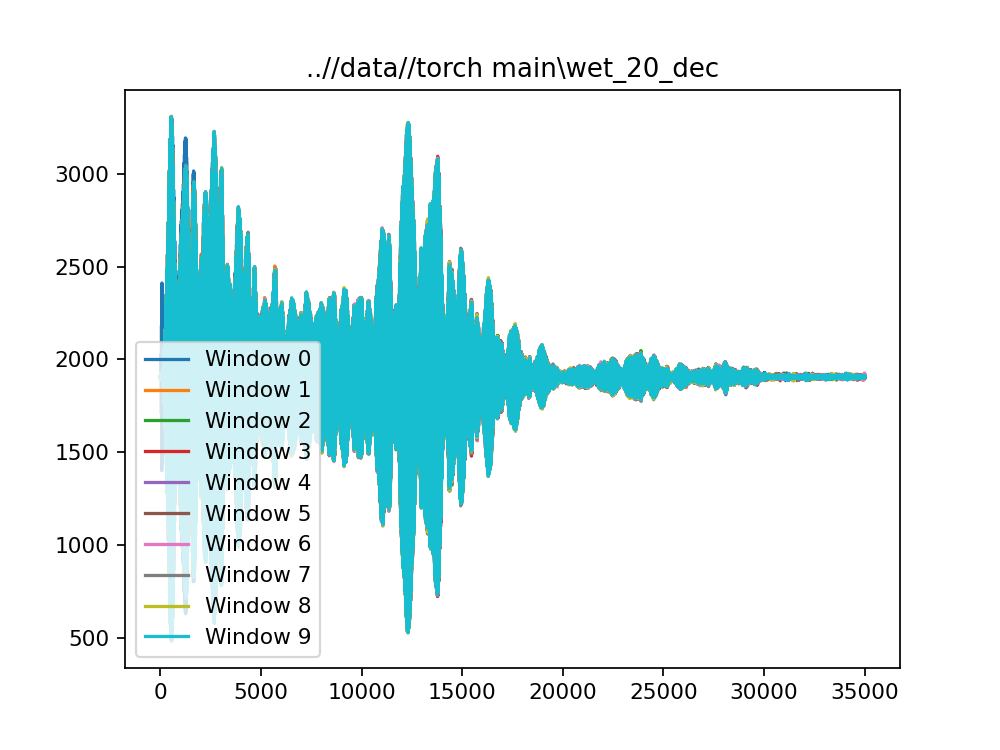

In [12]:
for file in allFiles:
    plot_mean(file)
    plot_windows(file, index=0)